In [1]:
import pandas as pd

df = pd.read_csv("2020.csv", low_memory=False)

In [2]:
df = df.drop(columns='Closed Date')
df = df.loc[df['Borough'] != 'Unspecified']

df


,Unique Key,Created Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Address Type,City,Landmark,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Location
0,64171216,02/24/2025 01:49:52 AM,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,11214.0,2505 BATH AVENUE,BATH AVENUE,ADDRESS,BROOKLYN,BATH AVENUE,11 BROOKLYN,BROOKLYN,986825.0,155767.0,"(40.59422027252566, -73.99072809741949)"
1,64170031,02/24/2025 01:48:55 AM,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,10038.0,180 SOUTH STREET,SOUTH STREET,ADDRESS,NEW YORK,SOUTH STREET,03 MANHATTAN,MANHATTAN,984536.0,197519.0,"(40.70882077853836, -73.99896841823647)"
2,64165803,02/24/2025 01:48:13 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11368.0,108-59 ROOSEVELT AVENUE,ROOSEVELT AVENUE,ADDRESS,CORONA,ROOSEVELT AVENUE,03 QUEENS,QUEENS,1023518.0,212871.0,"(40.750871076618466, -73.85827363537683)"
3,64170298,02/24/2025 01:47:50 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10029.0,1743 LEXINGTON AVENUE,LEXINGTON AVENUE,ADDRESS,NEW YORK,LEXINGTON AVENUE,11 MANHATTAN,MANHATTAN,999444.0,228485.0,"(40.79380155378193, -73.94512635677864)"
4,64167884,02/24/2025 01:43:11 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10465.0,1435 SHORE DRIVE,SHORE DRIVE,ADDRESS,BRONX,SHORE DRIVE,10 BRONX,BRONX,1035001.0,243182.0,"(40.83400795533042, -73.81660016701223)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3417795,45697994,02/25/2020 08:08:16 PM,NYPD,New York City Police Department,Noise - Residential,Banging/Pounding,Residential Building/House,11226.0,275 LINDEN BOULEVARD,LINDEN BOULEVARD,NaN,BROOKLYN,LINDEN BOULEVARD,17 BROOKLYN,BROOKLYN,998478.0,177079.0,"(40.65270619634423, -73.9487237728878)"
3417796,45691845,02/25/2020 08:07:31 PM,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,11205.0,196 CLINTON AVENUE,CLINTON AVENUE,NaN,BROOKLYN,CLINTON AVENUE,02 BROOKLYN,BROOKLYN,992944.0,191484.0,"(40.69225184930982, -73.96864914915056)"
3417797,45696470,02/25/2020 08:04:05 PM,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,NaN,10468.0,3102 VILLA AVENUE,VILLA AVENUE,NaN,BRONX,VILLA AVENUE,07 BRONX,BRONX,1015281.0,257912.0,"(40.87452868782109, -73.88779441151061)"
3417798,45692469,02/25/2020 08:03:07 PM,NYPD,New York City Police Department,Noise - Residential,Loud Television,NaN,11105.0,20-53 20 STREET,20 STREET,NaN,ASTORIA,20 STREET,01 QUEENS,QUEENS,1007992.0,224787.0,"(40.78363270884595, -73.9142680538334)"


## Quais bairros possuem menos reclamações de barulho?

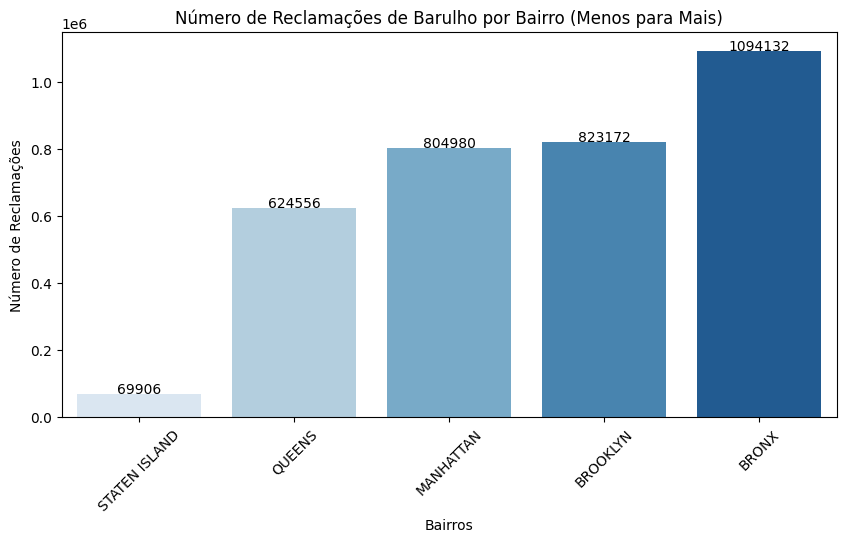

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.simplefilter("ignore", FutureWarning)

# Contar o número de reclamações por bairro
complaints_per_borough = df['Borough'].value_counts().sort_values()

# Criar o gráfico
plt.figure(figsize=(10, 5))
ax = sns.barplot(x=complaints_per_borough.index, y=complaints_per_borough.values, palette="Blues")

# Adicionando rótulos em cada barra
for i, v in enumerate(complaints_per_borough.values):
    ax.text(i, v + 100, str(v), ha='center', fontsize=10)

plt.xlabel("Bairros")
plt.ylabel("Número de Reclamações")
plt.title("Número de Reclamações de Barulho por Bairro (Menos para Mais)")
plt.xticks(rotation=45)
plt.show()

Essa análise busca identificar os bairros com menos reclamações de barulho na cidade de Nova York, ajudando pessoas sensíveis a ruídos, como idosos, autistas e trabalhadores que precisam de um ambiente mais silencioso. A ideia é fornecer um recurso útil para quem está decidindo onde morar e prioriza o silêncio.

## Como a quantidade e os tipos de reclamações de barulho variam ao longo do tempo e entre os bairros de Nova York?

In [14]:
import pandas as pd
import plotly.express as px
import dash
from dash import dcc, html
from dash.dependencies import Input, Output

# Converter 'Created Date' para datetime corretamente
df['Created Date'] = pd.to_datetime(df['Created Date'], format="%m/%d/%Y %I:%M:%S %p", errors='coerce')

# Remover linhas com datas inválidas
df = df.dropna(subset=['Created Date'])

# Criar coluna 'Year' (Ano)
df['Year'] = df['Created Date'].dt.year

# Remover linhas onde 'Borough' está vazio
df = df.dropna(subset=['Borough'])

# Criar app Dash no Jupyter
app = dash.Dash(__name__)

# Layout do dashboard
app.layout = html.Div([
    html.H1("Análise de Reclamações de Barulho em Nova York"),
    
    # Dropdown para selecionar o bairro
    dcc.Dropdown(
        id='borough-dropdown',
        options=[{'label': b, 'value': b} for b in sorted(df['Borough'].unique())],
        value=None,
        placeholder="Selecione um bairro",
        clearable=True
    ),
    
    # Gráfico de linha para reclamações ao longo do tempo
    dcc.Graph(id='line-chart'),
    
    # Gráfico de barras para os tipos de reclamação
    dcc.Graph(id='bar-chart')
])

# Callback para atualizar os gráficos com base na seleção do usuário
@app.callback(
    [Output('line-chart', 'figure'), Output('bar-chart', 'figure')],
    [Input('borough-dropdown', 'value')]
)
def update_charts(selected_borough):
    filtered_df = df[df['Borough'] == selected_borough] if selected_borough else df

    # Verificar se há dados para o filtro
    if filtered_df.empty:
        return px.line(title="Sem dados disponíveis"), px.bar(title="Sem dados disponíveis")
    
    # Gráfico de linha - Reclamações ao longo do tempo
    complaints_per_year = filtered_df.groupby('Year').size().reset_index(name='Count')
    line_fig = px.line(
        complaints_per_year,
        x='Year', y='Count',
        title=f"Evolução das Reclamações de Barulho {'em ' + selected_borough if selected_borough else ''}",
        labels={'Count': 'Número de Reclamações', 'Year': 'Ano'}
    )
    
    # Gráfico de barras - Tipos de reclamação
    complaints_per_type = filtered_df['Complaint Type'].value_counts().reset_index()
    complaints_per_type.columns = ['Complaint Type', 'Count']
    
    bar_fig = px.bar(
        complaints_per_type,
        x='Complaint Type', y='Count',
        title=f"Tipos Mais Comuns de Reclamações de Barulho {'em ' + selected_borough if selected_borough else ''}",
        labels={'Complaint Type': 'Tipo de Reclamação', 'Count': 'Quantidade'},
        color='Complaint Type'
    )
    
    return line_fig, bar_fig

# Rodar o servidor do Dash dentro do Jupyter
app.run_server(mode="inline")


# Análise de Reclamações de Barulho em Nova York  

## 📊 Descrição das Visualizações e Conclusão  

As visualizações criadas analisam as reclamações de barulho na cidade de Nova York ao longo do tempo e entre diferentes bairros.  

### 📈 Gráfico de Linha - Evolução das Reclamações ao Longo do Tempo  
Este gráfico mostra como o número de reclamações de barulho varia ano a ano. Isso permite identificar tendências sazonais ou mudanças nos padrões de barulho. Se houver um aumento em determinados anos, pode indicar mudanças nas políticas de fiscalização, crescimento populacional ou eventos específicos que impactaram o barulho na cidade.  

### 📊 Gráfico de Barras - Tipos Mais Comuns de Reclamações de Barulho  
Esse gráfico exibe quais tipos de barulho são mais relatados pelos moradores. Ele ajuda a entender se a maioria das reclamações vem de barulho de trânsito, construções, música alta, vizinhos ou outros fatores. Isso é útil para órgãos reguladores e moradores que querem saber quais são os principais problemas sonoros em cada região.  

**🔎 Conclusão:**  
Com esses gráficos, podemos observar **quais bairros têm mais ou menos reclamações**, **como elas evoluem ao longo dos anos** e **quais tipos de ruído são mais frequentes**. Essas informações são valiosas para tomadores de decisão, como agentes públicos que planejam políticas de controle de ruído ou moradores que querem escolher um bairro mais silencioso.

---

## 🎨 Explicação das Decisões de Design e Escolha das Visualizações  

Para garantir que a análise fosse clara e acessível, tomei algumas decisões de design estratégicas:

- **📌 Uso de um Gráfico de Linha para análise temporal**  
  - O gráfico de linha foi escolhido porque é a melhor forma de visualizar tendências ao longo do tempo. Isso permite identificar aumentos ou quedas no número de reclamações ano a ano.  

- **📌 Uso de um Gráfico de Barras para tipos de reclamação**  
  - Esse gráfico permite comparar facilmente as categorias de reclamação, ajudando a entender quais são os tipos mais frequentes de barulho relatados.  

- **📌 Uso de um Dropdown para selecionar bairros**  
  - O dropdown permite que os usuários filtrem as reclamações por bairro, tornando a visualização mais interativa e útil para diferentes públicos.  

- **📌 Cores e Estilo**  
  - A paleta de cores foi escolhida para facilitar a diferenciação dos elementos, sem sobrecarregar a visualização.  
  - Títulos e rótulos foram adicionados para garantir que o público possa entender os gráficos de maneira intuitiva.  

---

## ⚠️ Limitações e Compromissos  

### 🚧 **Limitações encontradas**  
- Algumas reclamações têm dados incompletos, como a ausência de datas ou a falta de especificação do bairro. Isso pode afetar a precisão dos gráficos.  
- Reclamações sem um tipo específico de barulho foram excluídas para evitar distorções nos gráficos.  

### ⚖️ **Compromissos assumidos**  
- Para evitar problemas com dados ausentes, fizemos um pré-processamento removendo valores inválidos.  
- O gráfico de linha usa a contagem total de reclamações por ano, o que pode mascarar variações sazonais (como meses específicos com mais reclamações).  


## PERGUNTA 3

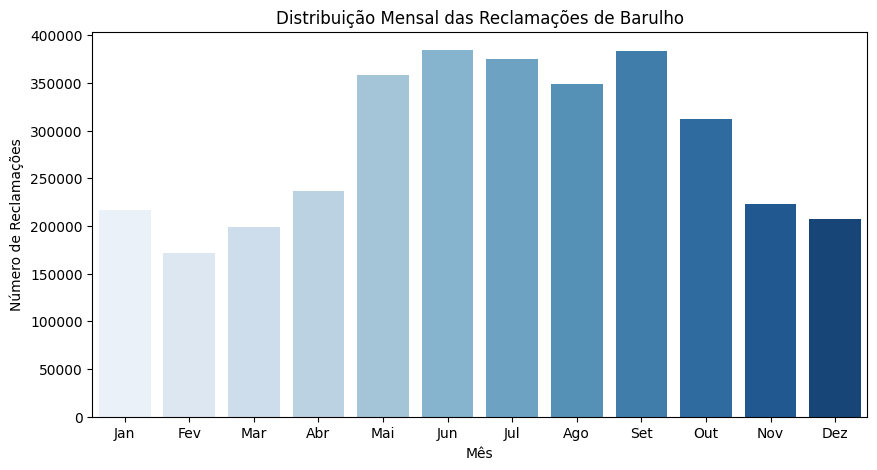

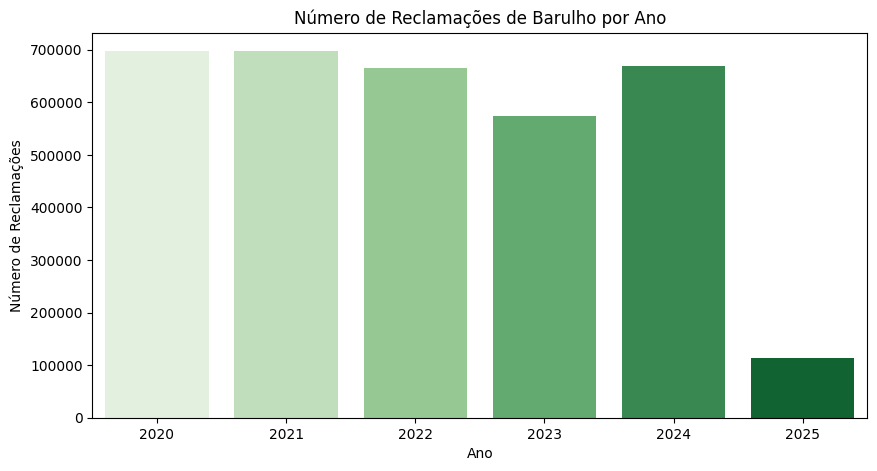

In [17]:
# Remover valores não especificados no bairro
df = df[df['Borough'] != 'Unspecified']

# Converter a coluna de data para datetime
df['Created Date'] = pd.to_datetime(df['Created Date'], format="%m/%d/%Y %I:%M:%S %p", errors='coerce')

# Criar colunas de Ano e Mês
df['Year'] = df['Created Date'].dt.year
df['Month'] = df['Created Date'].dt.month

## 🔹 Análise Sazonal: Quantidade de reclamações por mês
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x="Month", palette="Blues", order=sorted(df["Month"].unique()))
plt.xlabel("Mês")
plt.ylabel("Número de Reclamações")
plt.title("Distribuição Mensal das Reclamações de Barulho")
plt.xticks(range(12), ["Jan", "Fev", "Mar", "Abr", "Mai", "Jun", "Jul", "Ago", "Set", "Out", "Nov", "Dez"])
plt.show()

## 🔹 Comparação Anual: Reclamações ao longo dos anos
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x="Year", palette="Greens", order=sorted(df["Year"].unique()))
plt.xlabel("Ano")
plt.ylabel("Número de Reclamações")
plt.title("Número de Reclamações de Barulho por Ano")
plt.show()
